### Importing ###

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
#import numpy as np
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#from keras.utils import np_utils

# Normally  x--> features, y--> target (train / test)
# Capital big letters have feature set and target both
X = pickle.load(open("Xleaf.pickle", "rb"))
Y = pickle.load(open("yleaf.pickle", "rb"))

# Normalize or scale the data
X = X / 255.0

### Building CNN ### 

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(60, input_dim=32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
history = model.fit(X, Y, batch_size=32, epochs=4, validation_split=0.25)

Train on 572 samples, validate on 191 samples
Epoch 1/4
572/572 [==============================] - 58s 101ms/step - loss: 0.9163 - acc: 0.7010 - val_loss: 0.4500 - val_acc: 0.7801
Epoch 2/4
572/572 [==============================] - 54s 94ms/step - loss: 0.3808 - acc: 0.8217 - val_loss: 0.4178 - val_acc: 0.7801
Epoch 3/4
572/572 [==============================] - 55s 97ms/step - loss: 0.2819 - acc: 0.8759 - val_loss: 0.3900 - val_acc: 0.8063
Epoch 4/4
572/572 [==============================] - 53s 93ms/step - loss: 0.2268 - acc: 0.8986 - val_loss: 0.3533 - val_acc: 0.8691


### Saving the weights###

In [6]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


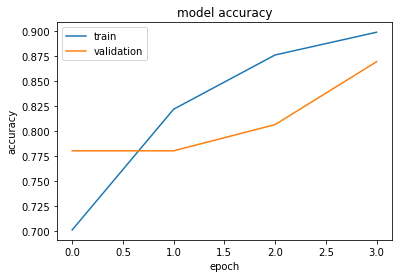

In [7]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')